#Data Files Included:
**nba_elo.csv** - Contains game-by-game Elo ratings and forecasts back to 1946.

**2023-24_NBA_Season_offensive_rating** - Contains data showing the effects of three-pointers on an NBA offense for yhe 2023-2024 Season only. (Data link: https://www.basketball-reference.com/leagues/NBA_2024.html#all_per_game_team-opponent) - relevant dataset is 'Advanced Stats' in the website.

Top_10_3Leaders.csv - NBA & ABA Year-by-Year Top 10 Leaders and Records for 3-Pt Field Goal Attempts
SOURCE LINK: https://www.basketball-reference.com/leaders/fg3a_top_10.html

threes_made_by_PGs.csv - illustrates the trend of threes made and threes attempted by Point Gaurds over multiple basketball seasons, spanning from 2000-01 to 2021-22.
SOURCE LINK: https://medium.com/boundless-ballin/visualizing-the-nbas-three-point-revolution-fef821e27a7a


/content/After_data_clean.jpeg

/content/Before_data_clean.jpeg

/content/2023-24_NBA_Season_offensive_rating.csv

/content/Top_10_3Leaders.csv

/content/threes_made_by_PGs.csv



# Project Introduction

This project aims to investigate the relationship between three-point attempts and offensive rating in the NBA. The analysis will focus on whether the shift towards more three-point shooting has led to improved offensive efficiency and if players are becoming better at making threes. Additionally, the project will examine if there are teams succeeding without being great three-point shooters and what types of threes teams should look to shoot.

**Hypothesis:** Teams that shoot more threes have a higher offensive rating in today's NBA.

**Changes Since the Proposal:**
The project scope has remained largely unchanged since the initial proposal. No parts have been removed or added to the plan.

GITHUB LINK: https://github.com/Apik1/NBA_3-Pointer_Analysis/blob/main/CS_418_Project.ipynb

Data Preparation
----------------

The data for this project has been collected from multiple sources, including the official NBA website, ESPN, and Basketball-reference.com. The following steps were taken to prepare the data for analysis:

1. Data Collection:
   - Team statistics data was downloaded in .csv format from the official NBA website and Basketball-reference.com. This data included information such as three-pointer attempts, offensive rating, and overall points scored for each team in each season.
   - Player-level data was obtained through web scraping techniques from ESPN and Basketball-reference.com. This data included player statistics related to three-pointers, such as attempts, makes, and shooting percentages.
   - Seasonal trend data was collected using APIs provided by the NBA website and Basketball-reference.com. This data covered multiple NBA seasons to track changes over time.

2. Data Cleaning:
   - The collected data was examined for missing values, inconsistencies, and outliers. Missing values were handled by either removing the corresponding records or filling them with appropriate values based on the context.
   - Inconsistencies in team and player names across different data sources were resolved by standardizing the names to ensure data integrity.
   - Outliers were identified using statistical methods and were either removed or treated as per the requirements of the analysis.

###Example:

If you run the code snippets below you will see an two images displayed. The first image is the dataset BEFORE data cleaning and the second image is the dataset AFTER data cleaning. basketball-reference.com allows you to easily manipulate the data set by deleting rows and colums you deem unimportant. This is what we used to extract relevant data regarding only 3 pointers.

In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('Before_data_clean.jpeg')

plt.figure(figsize=(50, 48))  # Adjust the figure size as needed
plt.imshow(img)
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Before_data_clean.jpeg'

In [ ]:


img = mpimg.imread('After_data_clean.jpeg')

plt.figure(figsize=(50, 48))  # Adjust the figure size as needed
plt.imshow(img)
plt.axis('off')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'After_data_clean.jpeg'


3. Data Integration:
   - The team statistics data, player-level data, and seasonal trend data were merged based on common attributes such as team name, player name, and season.
   - The merged dataset was checked for consistency and integrity to ensure that the data was properly aligned and free from any discrepancies.

4. Data Transformation:
   - Relevant columns were selected from the merged dataset to focus on the variables of interest, such as three-pointer attempts, offensive rating, and points scored.
   - New features were created based on the existing data to facilitate analysis. For example, a feature representing the percentage of three-point attempts out of total field goal attempts was calculated for each team in each season.
   - Categorical variables, such as team names and player positions, were encoded using appropriate techniques (e.g., one-hot encoding) to convert them into numerical representations suitable for analysis.

5. Data Scaling and Normalization:
   - Numerical features were scaled using techniques such as min-max scaling or standardization to ensure that the data was on a consistent scale and to prevent any particular feature from dominating the analysis.
   - Normalization techniques, such as log transformation or Box-Cox transformation, were applied to variables with skewed distributions to achieve a more normal distribution, if necessary.

6. Data Splitting:
   - The prepared dataset was split into training and testing subsets to facilitate model evaluation and prevent overfitting.
   - The splitting was done using stratified sampling techniques to ensure that the distribution of key variables (e.g., team performance, player positions) was similar in both the training and testing sets.

The data preparation process involved a combination of data collection, cleaning, integration, transformation, scaling, normalization, and splitting techniques. This ensured that the data was in a suitable format for exploratory data analysis and subsequent modeling tasks. The prepared dataset was then used for visualizations and statistical analysis to gain insights into the relationship between three-point attempts and offensive rating in the NBA.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Exploratory Data Analysis
-------------------------

We conducted an in-depth exploratory data analysis (EDA) to uncover patterns, trends, and relationships within the prepared dataset. The EDA focused on various aspects of three-point shooting and offensive rating in the NBA. The following visualizations and analyses were performed:

1. Three-Point Attempts (3PAr) vs. Offensive Rating (ORtg)
   - A scatter plot was created to visualize the relationship between the number of three-point attempts and offensive rating for teams in the latest season.
   - The plot revealed a positive correlation, indicating that teams with higher three-point attempts tend to have higher offensive ratings.



In [25]:
from adjustText import adjust_text
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data is already loaded and processed

# Create scatter plot
plt.figure(figsize=(10, 6))
points = plt.scatter(ThreePAr, ORtg, color='blue')
plt.title('3 Point Attempt Rating vs Offensive Rating')
plt.xlabel('3 Point Attempt Rating')
plt.ylabel('Offensive Rating')
plt.grid(False)

# Initialize an empty list for text objects
texts = []

# Add team labels and collect text objects
for i, team in enumerate(teams):
    texts.append(plt.text(ThreePAr[i], ORtg[i], team, ha='right', va='bottom'))

# Adjust the position of text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'adjustText'

2. Three-Point Attempt Rate for the top 5 teams vs league average over the past 20 years (Max Zurniewicz)


*   Will show us whether 3-pointers are leading to success in the current NBA and whether they did in the past
*   The average of the top 6 will be plotted each year as well as the league average



In [23]:
import pandas as pd
import matplotlib.pyplot as plt

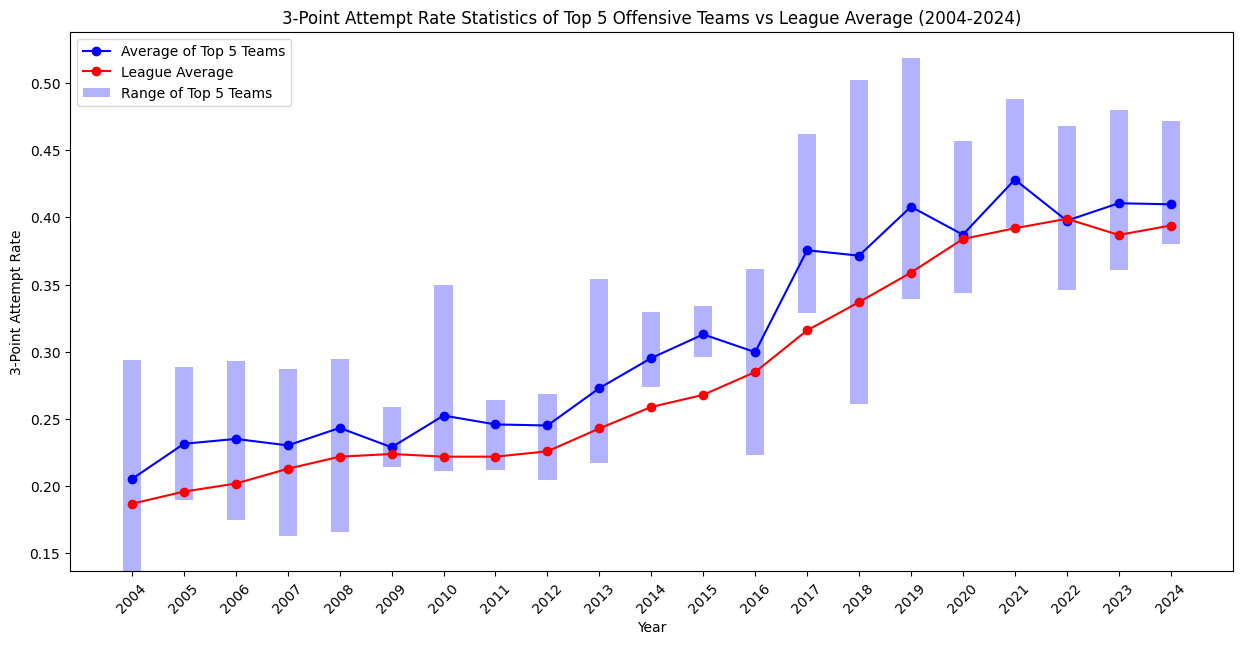

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

years = range(2004, 2025)
highest_top_5_ORtg_per_year = []
lowest_top_5_ORtg_per_year = []
avg_top_5_ORtg_per_year = []
league_avg_per_year = []

for year in years:
    df = pd.read_csv(f'{year}.csv')
    df.columns = df.columns.str.strip()

    # Sort the DataFrame based on ORtg to find the top 5 teams
    top_5 = df.sort_values(by='ORtg', ascending=False).head(5)
    highest_3PAr = top_5['3PAr'].max()
    lowest_3PAr = top_5['3PAr'].min()
    avg_3PAr = top_5['3PAr'].mean()

    # Get average from last row
    league_avg = df.tail(1)['3PAr'].values[0]

    highest_top_5_ORtg_per_year.append(highest_3PAr)
    lowest_top_5_ORtg_per_year.append(lowest_3PAr)
    avg_top_5_ORtg_per_year.append(avg_3PAr)
    league_avg_per_year.append(league_avg)

# Plotting
fig, ax = plt.subplots(figsize=(15, 7))

# Plot bars for the range of 3PAr in top 5 teams
bar_width = 0.35  # Width of the bars
ax.bar(years, [high - low for high, low in zip(highest_top_5_ORtg_per_year, lowest_top_5_ORtg_per_year)],
       bottom=lowest_top_5_ORtg_per_year, width=bar_width, color='blue', alpha=0.3, label='Range of Top 5 Teams')

# Plot average 3PAr for top 5 ORtg teams as a line and scatter
ax.plot(years, avg_top_5_ORtg_per_year, label='Average of Top 5 Teams', marker='o', linestyle='-', color='blue')

# Plot league average 3PAr
ax.plot(years, league_avg_per_year, label='League Average', marker='o', linestyle='-', color='red')

ax.set_xlabel('Year')
ax.set_ylabel('3-Point Attempt Rate')
ax.set_title('3-Point Attempt Rate Statistics of Top 5 Offensive Teams vs League Average (2004-2024)')
ax.legend()
plt.xticks(list(years), rotation=45)
plt.show()


3. Three-Point Attempts Over the Years - 3PA (Immanol Garcia)
   - The bar chart illustrates the trend of threes made and threes attempted by Point Gaurds over multiple basketball seasons, spanning from 2000-01 to 2021-22. Each bar represents a season, with two bars side by side corresponding to threes made and threes attempted, respectively. The height of each bar indicates the count of threes made or attempted in that particular season.
   - The graph displayed a clear increasing trend in the current season, highlighting the shift in the league towards more three-point shooting attempts.

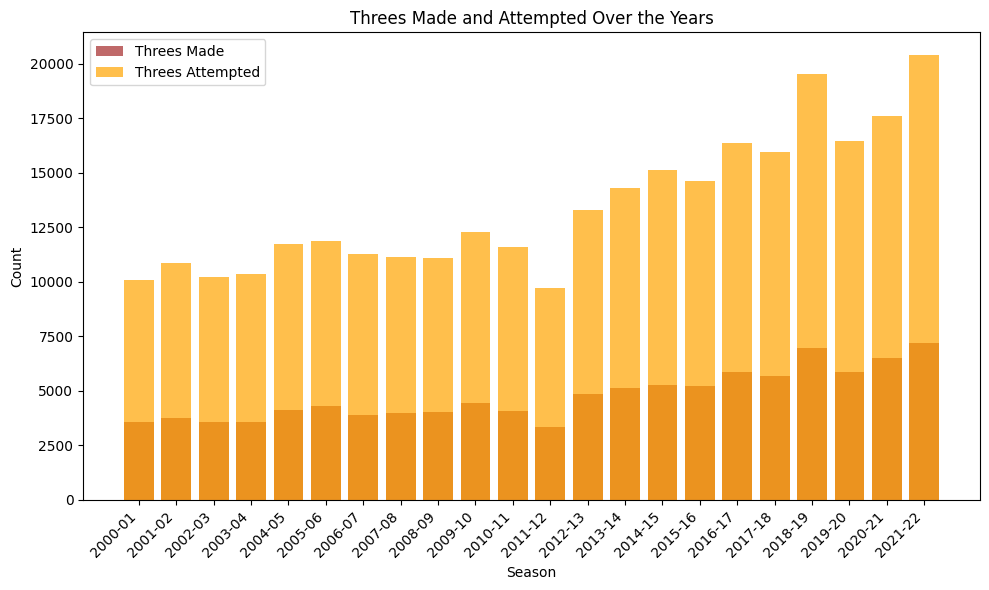

In [ ]:
import matplotlib.pyplot as plt

# Data
years = ["2000-01", "2001-02", "2002-03", "2003-04", "2004-05", "2005-06", "2006-07", "2007-08", "2008-09", "2009-10",
         "2010-11", "2011-12", "2012-13", "2013-14", "2014-15", "2015-16", "2016-17", "2017-18", "2018-19", "2019-20",
         "2020-21", "2021-22"]
threes_made = [3560, 3776, 3560, 3555, 4138, 4305, 3902, 3997, 4016, 4431, 4071, 3339, 4839, 5152, 5245, 5223, 5874,
               5662, 6953, 5864, 6500, 7215]
threes_attempted = [10079, 10851, 10241, 10353, 11744, 11861, 11266, 11113, 11081, 12302, 11573, 9732, 13272, 14303,
                    15102, 14598, 16375, 15954, 19529, 16470, 17608, 20414]

# Plotting
plt.figure(figsize=(10, 6))

plt.bar(years, threes_made, color='brown', alpha=0.7, label='Threes Made')
plt.bar(years, threes_attempted, color='orange', alpha=0.7, label='Threes Attempted')

plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Threes Made and Attempted Over the Years')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()






4. Offensive Rating vs. Three-Point Percentage (Immanol Garcia)
   - A scatter plot was generated to explore the relationship between a team's three-point shooting percentage and their offensive rating.
   - The plot indicated a positive relationship, suggesting that teams with higher three-point percentages tend to have better offensive ratings.





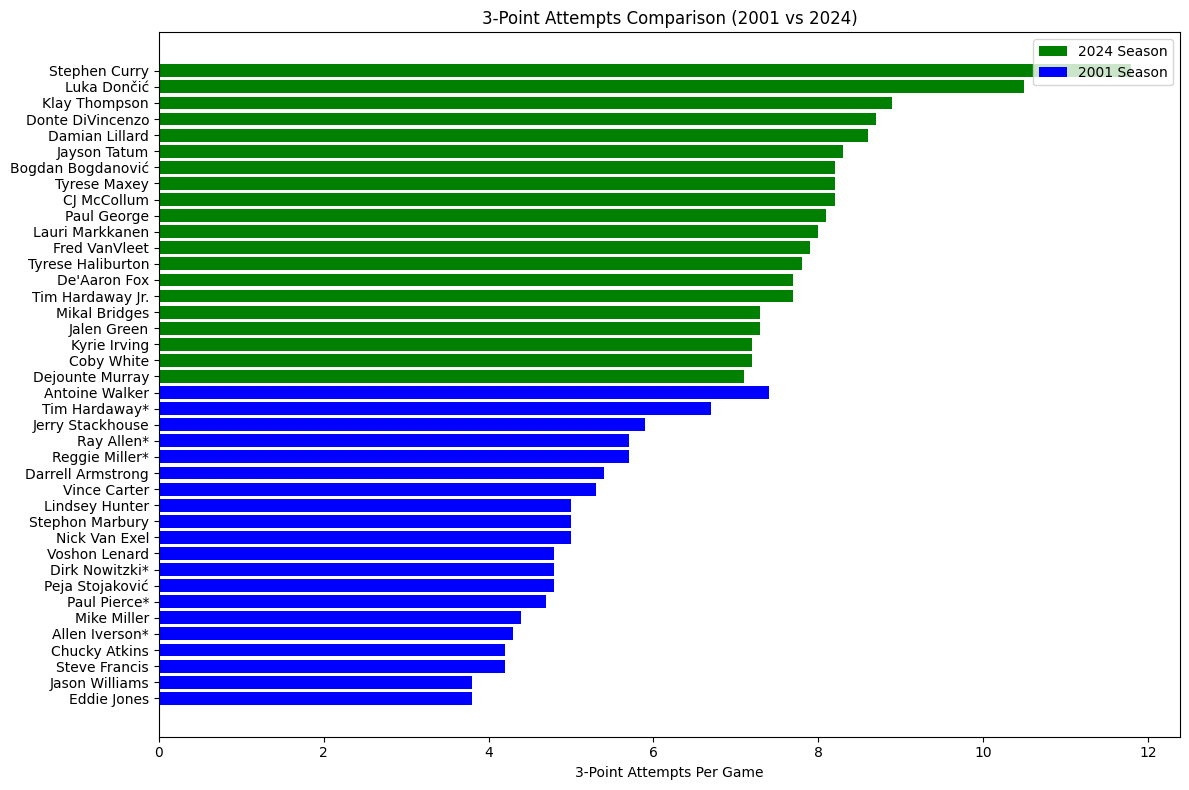

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from 2000-01 season
players_1 = [
    "Antoine Walker", "Tim Hardaway*", "Jerry Stackhouse", "Ray Allen*", "Reggie Miller*",
    "Darrell Armstrong", "Vince Carter", "Lindsey Hunter", "Stephon Marbury", "Nick Van Exel",
    "Voshon Lenard", "Dirk Nowitzki*", "Peja Stojaković", "Paul Pierce*", "Mike Miller",
    "Allen Iverson*", "Chucky Atkins", "Steve Francis", "Jason Williams", "Eddie Jones"
]
three_point_attempts_1 = [
    7.4, 6.7, 5.9, 5.7, 5.7, 5.4, 5.3, 5.0, 5.0, 5.0,
    4.8, 4.8, 4.8, 4.7, 4.4, 4.3, 4.2, 4.2, 3.8, 3.8
]
season_1 = ["2000-01"] * len(players_1)

# Data from 2023-24 season
players_2 = [
    "Stephen Curry", "Luka Dončić", "Klay Thompson", "Donte DiVincenzo", "Damian Lillard",
    "Jayson Tatum", "Bogdan Bogdanović", "Tyrese Maxey", "CJ McCollum", "Paul George",
    "Lauri Markkanen", "Fred VanVleet", "Tyrese Haliburton", "De'Aaron Fox", "Tim Hardaway Jr.",
    "Mikal Bridges", "Jalen Green", "Kyrie Irving", "Coby White", "Dejounte Murray"
]
three_point_attempts_2 = [
    11.8, 10.5, 8.9, 8.7, 8.6,
    8.3, 8.2, 8.2, 8.2, 8.1,
    8.0, 7.9, 7.8, 7.7, 7.7,
    7.3, 7.3, 7.2, 7.2, 7.1
]
season_2 = ["2023-24"] * len(players_2)

# Combine data with 2023-24 data first
players = players_2 + players_1
three_point_attempts = three_point_attempts_2 + three_point_attempts_1
season = season_2 + season_1

colors = {'2000-01': 'blue', '2023-24': 'green'}
colors_list = [colors[season[i]] for i in range(len(players))]

plt.figure(figsize=(12, 8))
plt.barh(players, three_point_attempts, color=colors_list)
plt.xlabel('3-Point Attempts Per Game')
plt.title('3-Point Attempts Comparison (2001 vs 2024)')
plt.gca().invert_yaxis()  # This inverts the y-axis so the most recent season appears on top
plt.tight_layout()

# Create the legend
legend_labels = list(colors.keys())
legend_colors = list(colors.values())
plt.legend([plt.Rectangle((0, 0), 1, 1, fc=legend_colors[1], edgecolor='none'),
            plt.Rectangle((0, 0), 1, 1, fc=legend_colors[0], edgecolor='none')],
           ['2024 Season', '2001 Season'],
           loc='upper right', fontsize=10)

plt.show()


5. Shows the effective field goal percentage of different shot distances.
Conclusion: layups and 3's are the most effective shot today

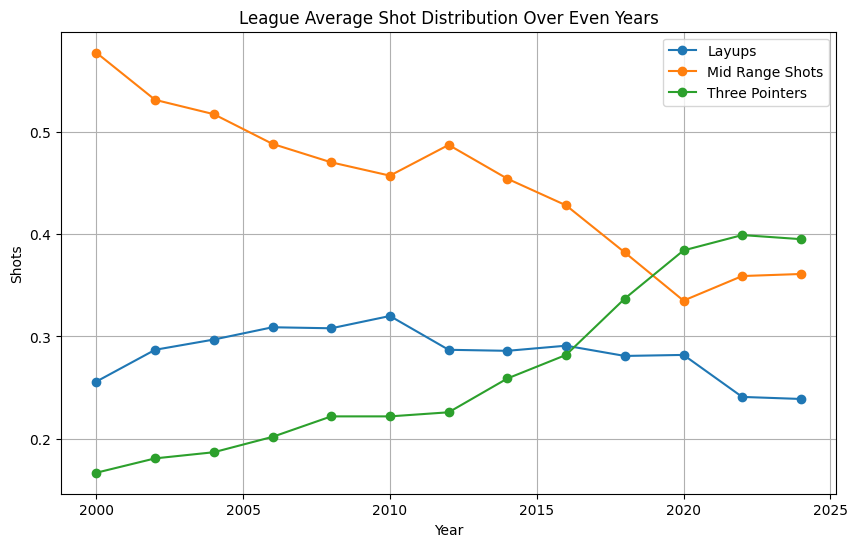

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the years and the file template
years = list(range(2000, 2026, 2))  # Generates every even year from 2000 to 2024
file_template = "shots_{}.csv"

# Initialize a dictionary to store the categorized data
data = {'Year': [], 'Layups': [], 'Mid Range Shots': [], 'Three Pointers': []}

# Process each file
for year in years:
    # Construct the file name
    file_name = file_template.format(year)
    # Load the CSV file
    df = pd.read_csv(file_name)

    # Use the last row for league averages
    last_row = df.iloc[-1]  # Selecting the last row

    # Accessing the first instance of each relevant column
    layups = last_row['0-3']  # First instance of '0-3'
    mid_range = last_row['3-10'] + last_row['10-16'] + last_row['16-3P']
    three_pointers = last_row['3P']  # First instance of '3P'

    # Append to data dictionary
    data['Year'].append(year)
    data['Layups'].append(layups)
    data['Mid Range Shots'].append(mid_range)
    data['Three Pointers'].append(three_pointers)

# Create a DataFrame from the data
summary_df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot('Year', 'Layups', data=summary_df, marker='o', label='Layups')
plt.plot('Year', 'Mid Range Shots', data=summary_df, marker='o', label='Mid Range Shots')
plt.plot('Year', 'Three Pointers', data=summary_df, marker='o', label='Three Pointers')
plt.title('League Average Shot Distribution Over Even Years')
plt.xlabel('Year')
plt.ylabel('Shots')
plt.legend()
plt.grid(True)
plt.show()


6. Analysing how shooting trends have changed based upon distance from basket

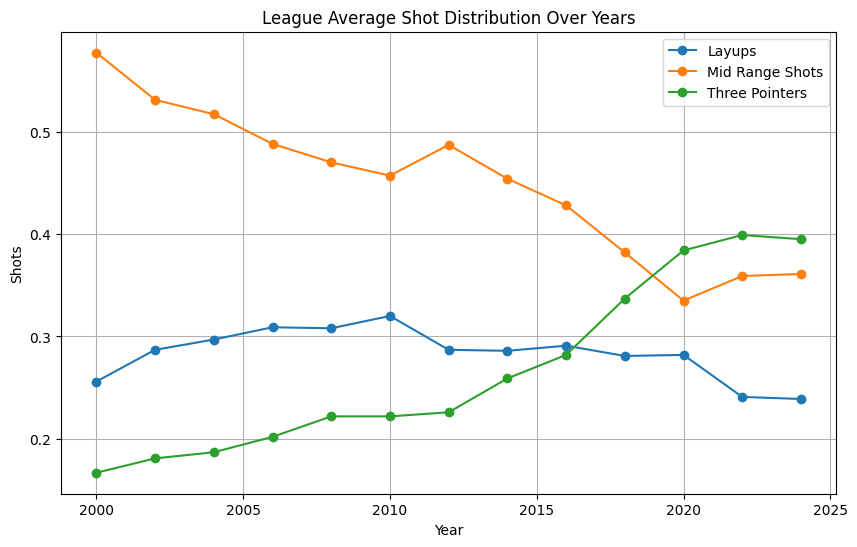

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the years and the file template
years = list(range(2000, 2026, 2))
file_template = "shots_{}.csv"

# Initialize a dictionary to store the categorized data
data = {'Year': [], 'Layups': [], 'Mid Range Shots': [], 'Three Pointers': []}

# Process each file
for year in years:
    # Construct the file name
    file_name = file_template.format(year)
    # Load the CSV file
    df = pd.read_csv(file_name)

    # Use the last row for league averages
    last_row = df.iloc[-1]  # Selecting the last row

    # Since columns are repeated, we need to ensure that we're using the first instance of each range
    layups = last_row['0-3']  # First instance of '0-3'
    mid_range = last_row['3-10'] + last_row['10-16'] + last_row['16-3P']
    three_pointers = last_row['3P']  # First instance of '3P'

    # Append to data dictionary
    data['Year'].append(year)
    data['Layups'].append(layups)
    data['Mid Range Shots'].append(mid_range)
    data['Three Pointers'].append(three_pointers)

# Create a DataFrame from the data
summary_df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot('Year', 'Layups', data=summary_df, marker='o', label='Layups')
plt.plot('Year', 'Mid Range Shots', data=summary_df, marker='o', label='Mid Range Shots')
plt.plot('Year', 'Three Pointers', data=summary_df, marker='o', label='Three Pointers')
plt.title('League Average Shot Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Shots')
plt.legend()
plt.grid(True)
plt.show()


ML Analysis

1. How many 3's will be shot in the future using Polynomial regression model








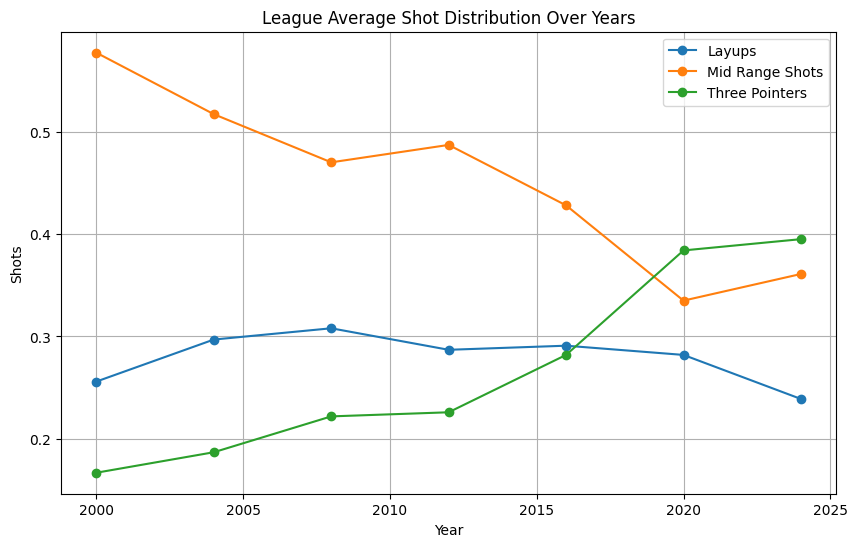

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the years and the file template
years = [2000, 2004, 2008, 2012, 2016, 2020, 2024]
file_template = "shots_{}.csv"

# Initialize a dictionary to store the categorized data
data = {'Year': [], 'Layups': [], 'Mid Range Shots': [], 'Three Pointers': []}

# Process each file
for year in years:
    # Construct the file name
    file_name = file_template.format(year)
    # Load the CSV file
    df = pd.read_csv(file_name)

    # Use the last row for league averages
    last_row = df.iloc[-1]  # Selecting the last row

    # Since columns are repeated, we need to ensure that we're using the first instance of each range
    layups = last_row['0-3']  # First instance of '0-3'
    mid_range = last_row['3-10'] + last_row['10-16'] + last_row['16-3P']
    three_pointers = last_row['3P']  # First instance of '3P'

    # Append to data dictionary
    data['Year'].append(year)
    data['Layups'].append(layups)
    data['Mid Range Shots'].append(mid_range)
    data['Three Pointers'].append(three_pointers)

# Create a DataFrame from the data
summary_df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot('Year', 'Layups', data=summary_df, marker='o', label='Layups')
plt.plot('Year', 'Mid Range Shots', data=summary_df, marker='o', label='Mid Range Shots')
plt.plot('Year', 'Three Pointers', data=summary_df, marker='o', label='Three Pointers')
plt.title('League Average Shot Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Shots')
plt.legend()
plt.grid(True)
plt.show()


Max ML model

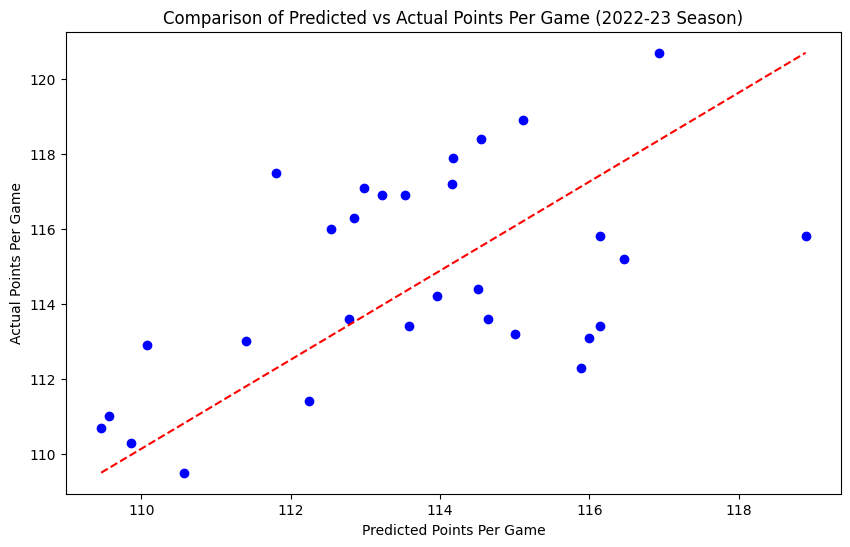

In [ ]:
import matplotlib.pyplot as plt

# Plot to visualize predictions (if historical test data is available)
plt.figure(figsize=(10, 6))
plt.scatter(y, model.predict(X_scaled), alpha=0.5)
plt.xlabel('Actual Final Rankings')
plt.ylabel('Predicted Final Rankings')
plt.title('Comparison of Actual vs Predicted Final Rankings')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.show()


2. Scoring Calculator:(Waji )

*   **Score Comparison between Teams:** calculating the total three points shot of each team than comparing with the teams with higher scores
*   **Players shot Average:** calculating the average of three points shot of every player in a team than comparing with the other teams with higher scores


Mean Squared Error: 2.5325645161289157e-07


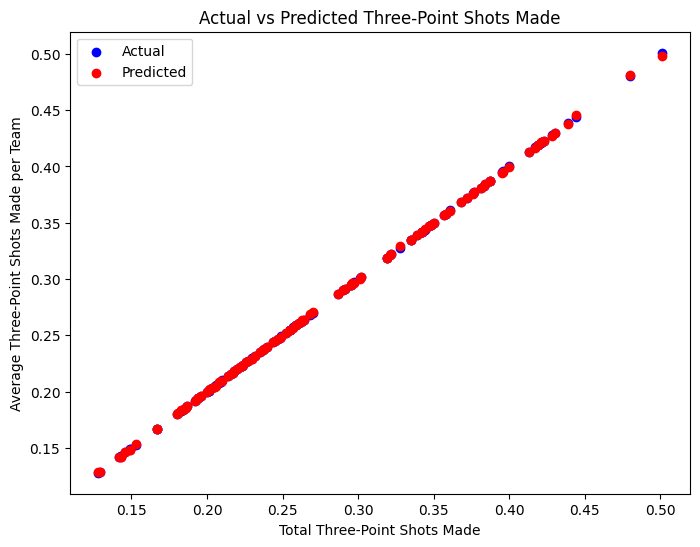

In [20]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load data in lists
team_total_3pt_shots_list = []
team_avg_3pt_shots_list = []

for season_year in range(2004, 2024):
    season_df = pd.read_csv(f'{season_year}.csv')
    season_team_total_3pt_shots = season_df.groupby('Team')['3PAr'].sum()
    team_total_3pt_shots_list.append(season_team_total_3pt_shots)
    season_team_avg_3pt_shots = season_df.groupby('Team')['3PAr'].mean().reset_index()
    team_avg_3pt_shots_list.append(season_team_avg_3pt_shots)

team_total_3pt_shots_df = pd.concat(team_total_3pt_shots_list)
team_avg_3pt_shots_df = pd.concat(team_avg_3pt_shots_list)
team_total_3pt_shots_df = team_total_3pt_shots_df.reset_index()
team_avg_3pt_shots_df = team_avg_3pt_shots_df.reset_index()
team_data = pd.concat([team_total_3pt_shots_df, team_avg_3pt_shots_df['3PAr']], axis=1)
team_data.columns = ['Team', 'Total_3pt', 'Avg_3pt']

X = team_data[['Total_3pt']]
y = team_data['Avg_3pt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Total Three-Point Shots Made')
plt.ylabel('Average Three-Point Shots Made per Team')
plt.title('Actual vs Predicted Three-Point Shots Made')
plt.legend()
plt.show()

Victors ML Model
Predicting future eFG%

In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# total 2-point shot percentage
data_2point = {
    "Team": ["Atlanta Hawks*", "Boston Celtics*", "Brooklyn Nets", "Charlotte Hornets", "Chicago Bulls*",
             "Cleveland Cavaliers*", "Dallas Mavericks*", "Denver Nuggets*", "Detroit Pistons", "Golden State Warriors*",
             "Houston Rockets", "Indiana Pacers*", "Los Angeles Clippers*", "Los Angeles Lakers*", "Memphis Grizzlies",
             "Miami Heat*", "Milwaukee Bucks*", "Minnesota Timberwolves*", "New Orleans Pelicans*", "New York Knicks*",
             "Oklahoma City Thunder*", "Orlando Magic*", "Philadelphia 76ers*", "Phoenix Suns*", "Portland Trail Blazers",
             "Sacramento Kings*", "San Antonio Spurs", "Toronto Raptors*", "Utah Jazz*", "Washington Wizards"],
    "2PointShot%": [.449, .476, .456, .437, .464, .457, .453, .462, .447, .466, .465, .478, .457, .460, .439, .448, .476,
                    .466, .469, .449, .463, .449, .448, .459, .443, .473, .458, .454, .468, .441]
}

data_efg_x = {
    "Team": ["Atlanta Hawks*", "Boston Celtics*", "Brooklyn Nets", "Charlotte Hornets", "Chicago Bulls*",
             "Cleveland Cavaliers*", "Dallas Mavericks*", "Denver Nuggets*", "Detroit Pistons", "Golden State Warriors*",
             "Houston Rockets", "Indiana Pacers*", "Los Angeles Clippers*", "Los Angeles Lakers*", "Memphis Grizzlies",
             "Miami Heat*", "Milwaukee Bucks*", "Minnesota Timberwolves*", "New Orleans Pelicans*", "New York Knicks*",
             "Oklahoma City Thunder*", "Orlando Magic*", "Philadelphia 76ers*", "Phoenix Suns*", "Portland Trail Blazers",
             "Sacramento Kings*", "San Antonio Spurs", "Toronto Raptors", "Utah Jazz", "Washington Wizards"],
    "eFG_x": [.539, .578, .531, .529, .534, .557, .562, .562, .526, .557, .529, .578, .561, .566, .509, .538, .568, .559,
             .558, .540, .573, .541, .532, .565, .503, .556, .532, .535, .539, .538]
}


data_efg_y = {
    "Team": ["Atlanta Hawks*", "Boston Celtics*", "Brooklyn Nets*", "Charlotte Hornets", "Chicago Bulls*",
             "Cleveland Cavaliers*", "Dallas Mavericks*", "Denver Nuggets*", "Detroit Pistons", "Golden State Warriors*",
             "Houston Rockets", "Indiana Pacers", "Los Angeles Clippers*", "Los Angeles Lakers*", "Memphis Grizzlies*",
             "Miami Heat*", "Milwaukee Bucks*", "Minnesota Timberwolves*", "New Orleans Pelicans*", "New York Knicks*",
             "Oklahoma City Thunder*", "Orlando Magic*", "Philadelphia 76ers*", "Phoenix Suns*", "Portland Trail Blazers",
             "Sacramento Kings*", "San Antonio Spurs", "Toronto Raptors*", "Utah Jazz", "Washington Wizards"],
    "eFG_y": [.541, .566, .562, .516, .550, .556, .565, .573, .520, .571, .516, .545, .551, .542, .540, .530, .555, .560,
              .543, .541, .531, .532, .563, .535, .549, .572, .525, .517, .547, .550]
}

data_efg_z = {
    "Team": ["Atlanta Hawks*", "Boston Celtics*", "Brooklyn Nets*", "Charlotte Hornets", "Chicago Bulls*",
             "Cleveland Cavaliers", "Dallas Mavericks*", "Denver Nuggets*", "Detroit Pistons", "Golden State Warriors*",
             "Houston Rockets", "Indiana Pacers", "Los Angeles Clippers", "Los Angeles Lakers", "Memphis Grizzlies*",
             "Miami Heat*", "Milwaukee Bucks*", "Minnesota Timberwolves*", "New Orleans Pelicans*", "New York Knicks",
             "Oklahoma City Thunder", "Orlando Magic", "Philadelphia 76ers*", "Phoenix Suns*", "Portland Trail Blazers",
             "Sacramento Kings", "San Antonio Spurs", "Toronto Raptors*", "Utah Jazz*", "Washington Wizards"],
    "eFG_z": [.543, .542, .540, .544, .541, .538, .538, .556, .494, .552, .534, .531, .531, .537, .522, .547, .546, .539,
              .517, .513, .497, .503, .534, .549, .515, .525, .527, .510, .555, .532]
}

df_2point = pd.DataFrame(data_2point)
df_efg_x = pd.DataFrame(data_efg_x)
df_efg_y = pd.DataFrame(data_efg_y)
df_efg_z = pd.DataFrame(data_efg_z)

# Merge DataFrames on 'Team' column for years x, y, and z
merged_df_x = pd.merge(df_2point, df_efg_x, on='Team')
merged_df_y = pd.merge(df_2point, df_efg_y, on='Team')
merged_df_z = pd.merge(df_2point, df_efg_z, on='Team')

# Training data for year x, y, z
X_x = merged_df_x[['2PointShot%']]
y_x = merged_df_x[['eFG_x']]

X_y = merged_df_y[['2PointShot%']]
y_y = merged_df_y[['eFG_y']]

X_z = merged_df_z[['2PointShot%']]
y_z = merged_df_z[['eFG_z']]

# train linear regression
model_x = LinearRegression()
model_x.fit(X_x, y_x)

model_y = LinearRegression()
model_y.fit(X_y, y_y)

model_z = LinearRegression()
model_z.fit(X_z, y_z)

specific_2point_percentage = 0.450

predicted_efg_x = model_x.predict([[specific_2point_percentage]])
predicted_efg_y = model_y.predict([[specific_2point_percentage]])
predicted_efg_z = model_z.predict([[specific_2point_percentage]])

print("Predicted eFG% for Year 2024:", predicted_efg_x[0][0])
print("Predicted eFG% for Year 2023:", predicted_efg_y[0][0])
print("Predicted eFG% for Year 2022:", predicted_efg_z[0][0])


Predicted eFG% for Year 2024: 0.5376937389487222
Predicted eFG% for Year 2023: 0.5397708330472752
Predicted eFG% for Year 2022: 0.5323247556153274


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#Reflection
1. The most challenging part of the project so far has been data collection and preprocessing. Ensuring data consistency and merging data from multiple sources required careful handling and transformation.
2. Initial insights suggest that there is indeed a positive relationship between three-point attempts and offensive rating. Teams that shoot more threes tend to have higher offensive efficiency. However, shooting efficiency also plays a crucial role, as teams with higher three-point percentages generally have better offensive ratings.
3. Concrete results at this point include the visualizations mentioned above, which provide evidence supporting the hypothesis. However, further analysis and statistical modeling are needed to quantify the relationship and control for other factors.
4. The current biggest problems moving forward include accounting for other variables that may impact offensive rating, such as pace of play, defensive strategies of opponents, and individual player contributions.
5. The project is on track, but more time needs to be dedicated to statistical modeling and interpreting the results to draw meaningful conclusions.
6. Given the initial exploration of the data, it is worth proceeding with the project. The data shows interesting patterns and trends that warrant further investigation. The project has the potential to provide valuable insights into the impact of three-point shooting on offensive efficiency in the modern NBA.